# Shallow Water Equations

In [318]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import animation
from IPython.display import HTML

## Newtonian, 2d, single layer

In [323]:
# define grids
nx = 2000
nt = 2000
xmin = 0.
xmax = 10.

x = np.linspace(xmin, xmax, num=nx-2, endpoint=False)
hu = np.zeros((nx, nt+1))
h = np.zeros((nx, nt+1))
# Start off with an initial water hill
h[1:-1,0] = 1 + 0.4 * np.exp(-(x-5)**2*2) #0.01 * np.sin(0.25 * np.pi + 2. * np.pi * x / (xmax - xmin)) + 1.
h[0,0] = h[-2,0]
h[-1,0] = h[1,0]

#hu[:,0] = 0.1 * h[:,0]

dx = x[1] - x[0]
dt = 0.5 * dx

# set gravity
g = 1.0

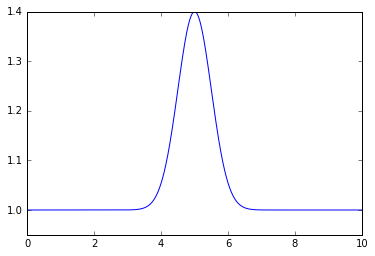

In [274]:
plt.plot(x,h[1:-1,0])
plt.show()

In [291]:
# evolution using second-order Lax-Wendroff
def evolve(n):
    
    # Jacobean
    J = np.zeros((nx-2, 2, 2))
    J[:,0,1] = 1.
    J[:,1,0] = -(hu[1:-1,n]/h[1:-1,n])**2 + g * h[1:-1,n]
    J[:,1,1] =  2 * hu[1:-1,n] / h[1:-1,n]
    
    J2 = np.array([np.dot(J[i,:,:], J[i,:,:]) for i in range(nx-2)])
    
    h[1:-1,n+1] = h[1:-1,n] - 0.5 * dt/dx * (J[:,0,0] * (h[2:,n] - h[:-2,n]) + J[:,0,1] * (hu[2:,n] - hu[:-2,n])) +\
                  0.5 * (dt/dx)**2 * (J2[:,0,0] * (h[:-2,n] - 2 * h[1:-1,n] + h[2:,n]) + \
                                      J2[:,0,1] * (hu[:-2,n] - 2 * hu[1:-1,n] + hu[2:,n]))
    hu[1:-1,n+1] = hu[1:-1,n] - 0.5 * dt/dx * (J[:,1,0] * (h[2:,n] - h[:-2,n]) + J[:,1,1] * (hu[2:,n] - hu[:-2,n]))+ \
                  0.5 * (dt/dx)**2 * (J2[:,1,0] * (h[:-2,n] - 2 * h[1:-1,n] + h[2:,n]) + \
                                      J2[:,1,1] * (hu[:-2,n] - 2 * hu[1:-1,n] + hu[2:,n]))

    # do boundaries - periodic
    h[0,n+1] = h[-2,n+1]
    h[-1,n+1] = h[1,n+1]
    hu[0,n+1] = hu[-2,n+1]
    hu[-1,n+1] = hu[1,n+1]

In [324]:
for i in range(nt):
    evolve(i)

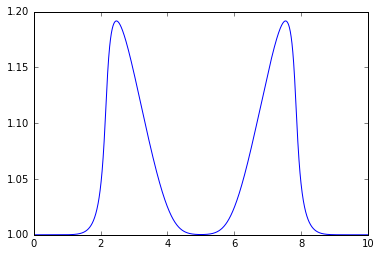

In [325]:
plt.plot(x,h[1:-1,800])
plt.show()

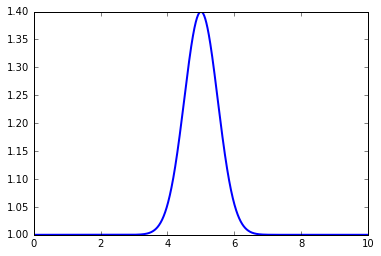

In [332]:
fig = plt.figure()
ax = plt.axes(xlim=(0,10), ylim=(1.,1.4))
line = ax.plot([],[], lw=2)[0]
def init():
    line.set_data([],[])
    return line,

def animate(i):
    line.set_data(x, h[1:-1,i*10])
    #return line

anim = animation.FuncAnimation(fig, animate, frames=130, interval=20)#, blit=True)

In [330]:
HTML(anim.to_html5_video())